## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np 
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
sns.set_palette("Set1")

adhd_df = pd.read_csv("/content/drive/MyDrive/adhdreddit/FinalData/adhd_posts_cleaned.csv", error_bad_lines=False)
askreddit_df = pd.read_csv("/content/drive/MyDrive/adhdreddit/FinalData/askreddit_posts_cleaned.csv", error_bad_lines=False)
subreddits_df = pd.concat([adhd_df,askreddit_df])
subreddits_df = subreddits_df[subreddits_df["subreddit_name_prefixed"]!="r/cofounder"]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
len(adhd_df)

315344

##Frequency over time

   subreddit_name_prefixed created_utc  content
0                   r/ADHD  2018-08-31     3130
1                   r/ADHD  2018-09-30     3108
2                   r/ADHD  2018-10-31     3429
3                   r/ADHD  2018-11-30     3466
4                   r/ADHD  2018-12-31     3375
..                     ...         ...      ...
85             r/AskReddit  2021-12-31     1827
86             r/AskReddit  2022-01-31     2211
87             r/AskReddit  2022-02-28     1856
88             r/AskReddit  2022-03-31     1927
89             r/AskReddit  2022-04-30     2529

[90 rows x 3 columns]


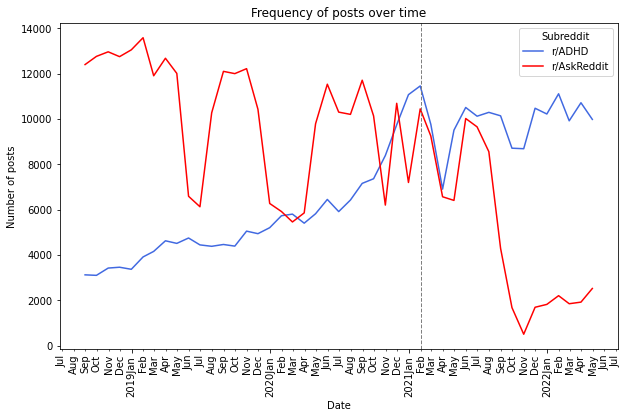

In [ ]:
#Make sure time is in the right format
subreddits_df['created_utc'] = pd.to_datetime(subreddits_df['created_utc'], format = '%Y-%m-%d')

#Group by subreddit and month
df_grouped_freq = subreddits_df.groupby(["subreddit_name_prefixed",pd.Grouper(key='created_utc', freq='m')])["content"].count().reset_index()
print(df_grouped_freq)

#plot
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(data = df_grouped_freq ,y = "content" ,x="created_utc",hue="subreddit_name_prefixed", palette = ["royalblue","red"])

##Date formatting
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y%b') 
months_fmt = mdates.DateFormatter('%b') 
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)

##Axis names, ticks and title
plt.legend(title = "Subreddit")
plt.ylabel("Number of posts")
plt.xlabel("Date")
plt.title("Frequency of posts over time")

plt.xticks(rotation = 'vertical')
for text in ax.get_xminorticklabels():
  text.set_rotation(90)
plt.axvline(pd.to_datetime('2021-02-01'), color='gray', linestyle='--', lw=1)

plt.title("Frequency of posts over time")
plt.show()

In [ ]:
df_grouped

## Average length

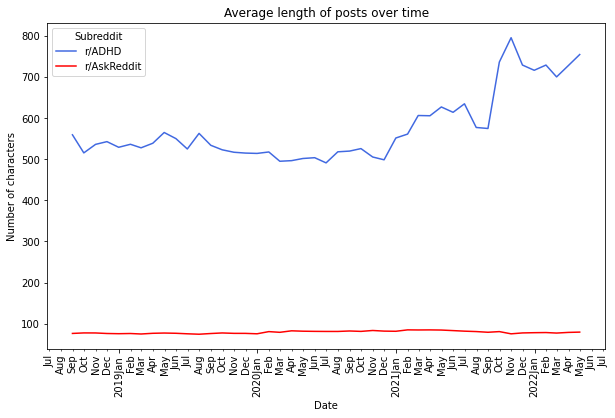

In [ ]:
#Make sure time is in the right format
subreddits_df['created_utc'] = pd.to_datetime(subreddits_df['created_utc'], format = '%Y-%m-%d')
subreddits_df['post_charachter_count'] = subreddits_df['content'].str.len()
subreddits_df['post_charachter_count'] = subreddits_df['content'].str.len()

#Group by subreddit and month
df_grouped = subreddits_df.groupby(["subreddit_name_prefixed",pd.Grouper(key='created_utc', freq='m')])["post_charachter_count"].mean().reset_index(name="mean")

#plot
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(data = df_grouped ,y = "mean" ,x="created_utc",hue="subreddit_name_prefixed", palette = ["royalblue","red"])

##Date formatting
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y%b') 
months_fmt = mdates.DateFormatter('%b') 
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)

##Axis names, ticks and title
plt.legend(title = "Subreddit")
plt.ylabel("Number of characters")
plt.xlabel("Date")
plt.title("Average length of posts over time")

plt.xticks(rotation = 'vertical')
for text in ax.get_xminorticklabels():
  text.set_rotation(90)

plt.show()

In [ ]:
subreddits_df

In [ ]:
df_grouped[df_grouped["subreddit_name_prefixed"]=="r/ADHD"].describe()

,mean
count,45.000000
mean,575.965947
std,83.799492
min,491.323480
25%,517.860031
50%,539.109456
75%,606.617015
max,795.971241


In [ ]:
df_grouped[df_grouped["subreddit_name_prefixed"]=="r/AskReddit"].describe()

,mean
count,45.000000
mean,79.062072
std,3.070443
min,74.223292
25%,76.338269
50%,78.646082
75%,81.401166
max,84.825263


## Covid

In [ ]:
keywords = ["covid", "covid-19","asymptomatic", "confirmed cases", "contact tracing","coronavirus", "covid19","lockdown","pfizer","pandemic","postcovid","postpandemic","stay at home","stayhome","vaccinated"]
subreddits_df["content"]= subreddits_df["content"].str.lower()
subreddits_df_covid = subreddits_df[subreddits_df.content.str.contains('|'.join(keywords))]
adhd_df_covid = subreddits_df[subreddits_df["subreddit_name_prefixed"]=="r/ADHD"]
askreddit_df_covid = subreddits_df[subreddits_df["subreddit_name_prefixed"]=="r/AskReddit"]

### Frequency

<ipython-input-86-230235fc239c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddits_df_covid['created_utc'] = pd.to_datetime(subreddits_df_covid['created_utc'], format = '%Y-%m-%d')


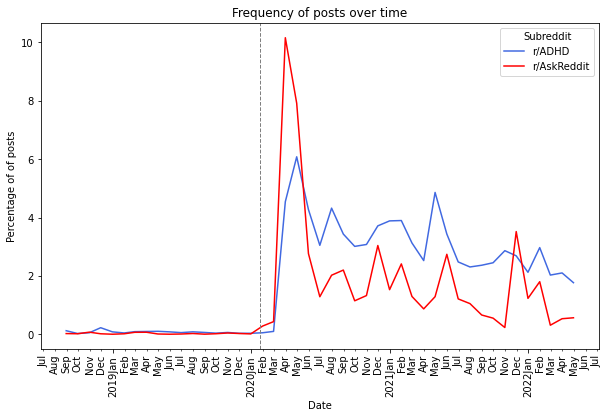

In [ ]:
#Make sure time is in the right format
subreddits_df_covid['created_utc'] = pd.to_datetime(subreddits_df_covid['created_utc'], format = '%Y-%m-%d')

#Group by subreddit and month
df_grouped = subreddits_df_covid.groupby(["subreddit_name_prefixed",pd.Grouper(key='created_utc', freq='m')])["content"].count().reset_index(name = "frequency")
df_grouped["frequency"] = df_grouped["frequency"]/df_grouped_freq["content"]*100
#plot
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(data = df_grouped ,y = "frequency" ,x="created_utc",hue="subreddit_name_prefixed", palette = ["royalblue","red"])

##Date formatting
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y%b') 
months_fmt = mdates.DateFormatter('%b') 
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)

##Axis names, ticks and title
plt.legend(title = "Subreddit")
plt.ylabel("Percentage of of posts")
plt.xlabel("Date")
plt.title("Percentage of posts referring to covid over time")

plt.xticks(rotation = 'vertical')
for text in ax.get_xminorticklabels():
  text.set_rotation(90)
plt.axvline(pd.to_datetime('2020-01-23'), color='gray', linestyle='--', lw=1)

plt.title("Frequency of posts over time")
plt.show()

In [ ]:
count_covid = subreddits_df_covid.groupby("subreddit_name_prefixed")["content"].count().reset_index()
count_covid["content"] = count_covid["content"]/subreddits_df.groupby("subreddit_name_prefixed")["content"].count().reset_index()["content"]*100
count_covid

,subreddit_name_prefixed,content
0,r/ADHD,2.231214
1,r/AskReddit,0.978035


In [ ]:
df_grouped

### Top words 

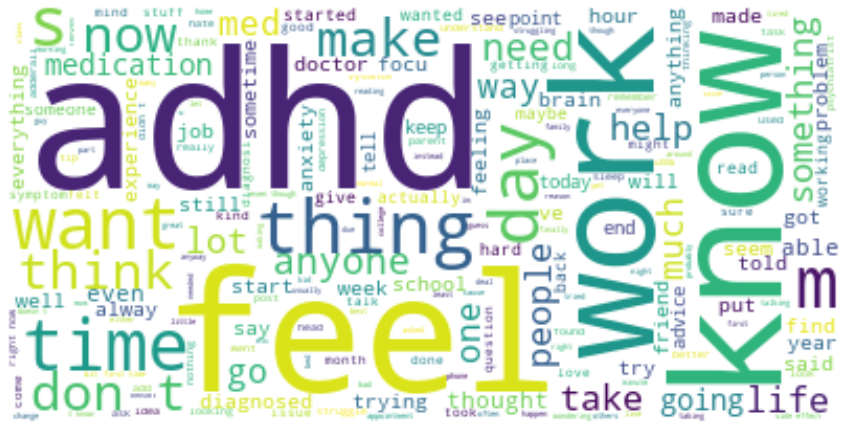

In [ ]:
text = " ".join(i for i in adhd_df_covid.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

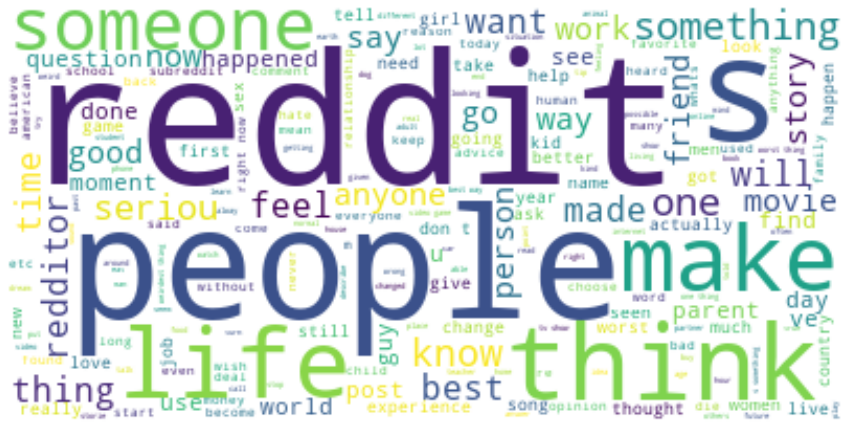

In [ ]:
text = " ".join(i for i in askreddit_df_covid.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()